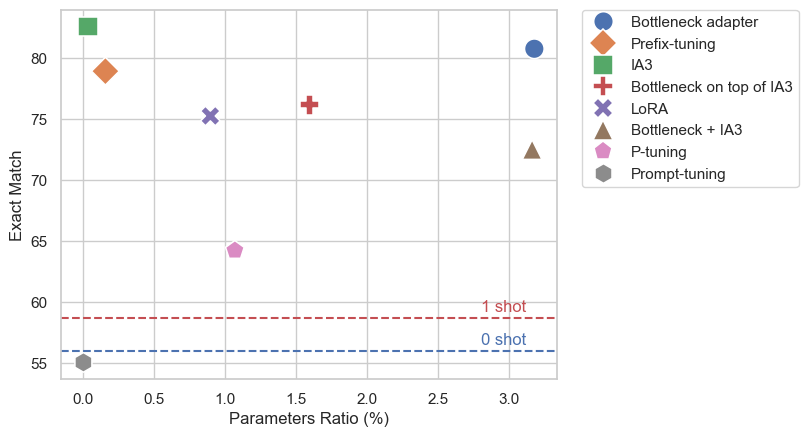

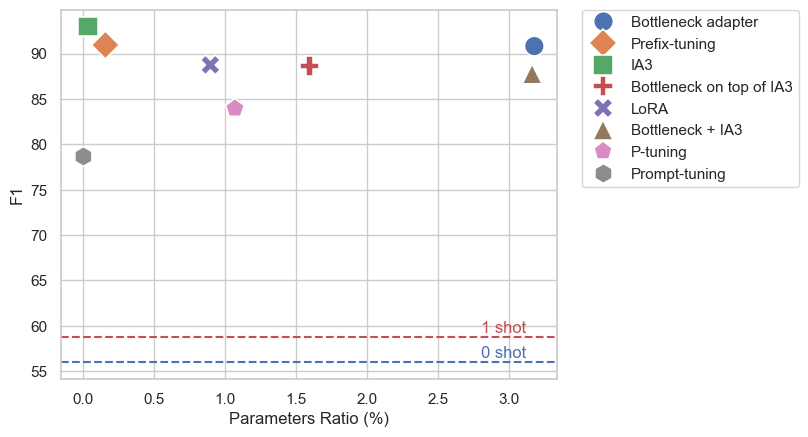

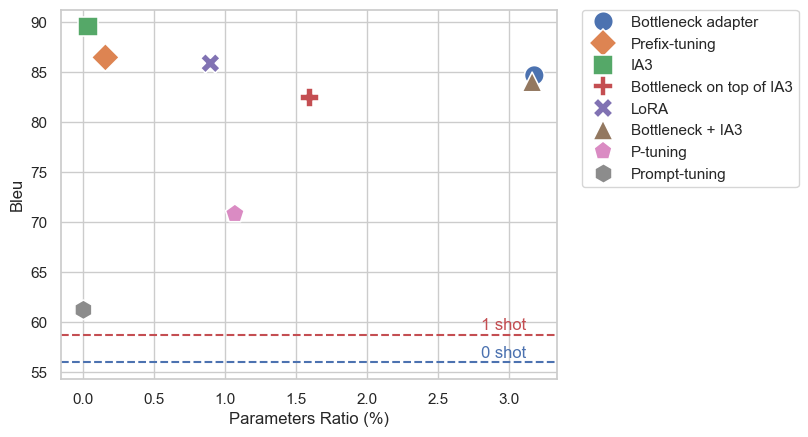

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read data from analysis-result.csv
df = pd.read_csv("analysis-result.csv")

markers = ["o", "D", "s", "P", "X", "^", "p", "h"]

sns.set_theme(style="whitegrid")

em_scat = sns.scatterplot(
    x="param_ratio",
    y="em",
    hue="method",
    data=df[0 : len(df) - 3],
    s=200,
    style=df[0 : len(df) - 3]["method"],
    markers=markers,
)
em_scat.set(xlabel="Parameters Ratio (%)", ylabel="Exact Match")
plt.axhline(
    y=df.iloc[len(df) - 2]["em"], color="r", linestyle="dashed", label="_nolegend_"
)
plt.axhline(
    y=df.iloc[len(df) - 1]["em"], color="b", linestyle="dashed", label="_nolegend_"
)
plt.text(2.8, df.iloc[len(df) - 2]["em"] + 0.5, "1 shot", color="r")
plt.text(2.8, df.iloc[len(df) - 1]["em"] + 0.5, "0 shot", color="b")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
plt.show()
em_scat.figure.savefig("./figs/em.png", bbox_inches="tight")

f1_scat = sns.scatterplot(
    x="param_ratio",
    y="f1",
    hue="method",
    data=df[0 : len(df) - 3],
    s=200,
    style=df[0 : len(df) - 3]["method"],
    markers=markers,
)
f1_scat.set(xlabel="Parameters Ratio (%)", ylabel="F1")
plt.axhline(
    y=df.iloc[len(df) - 2]["em"], color="r", linestyle="dashed", label="_nolegend_"
)
plt.axhline(
    y=df.iloc[len(df) - 1]["em"], color="b", linestyle="dashed", label="_nolegend_"
)
plt.text(2.8, df.iloc[len(df) - 2]["em"] + 0.5, "1 shot", color="r")
plt.text(2.8, df.iloc[len(df) - 1]["em"] + 0.5, "0 shot", color="b")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
plt.show()
f1_scat.figure.savefig("./figs/f1.png", bbox_inches="tight")

f1_scat = sns.scatterplot(
    x="param_ratio",
    y="bleu",
    hue="method",
    data=df[0 : len(df) - 3],
    s=200,
    style=df[0 : len(df) - 3]["method"],
    markers=markers,
)
f1_scat.set(xlabel="Parameters Ratio (%)", ylabel="Bleu")
plt.axhline(
    y=df.iloc[len(df) - 2]["em"], color="r", linestyle="dashed", label="_nolegend_"
)
plt.axhline(
    y=df.iloc[len(df) - 1]["em"], color="b", linestyle="dashed", label="_nolegend_"
)
plt.text(2.8, df.iloc[len(df) - 2]["em"] + 0.5, "1 shot", color="r")
plt.text(2.8, df.iloc[len(df) - 1]["em"] + 0.5, "0 shot", color="b")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
plt.show()
f1_scat.figure.savefig("./figs/bleu.png", bbox_inches="tight")

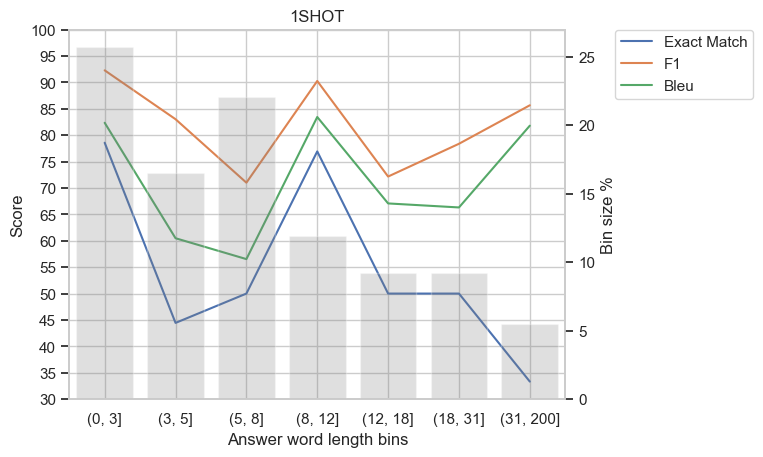

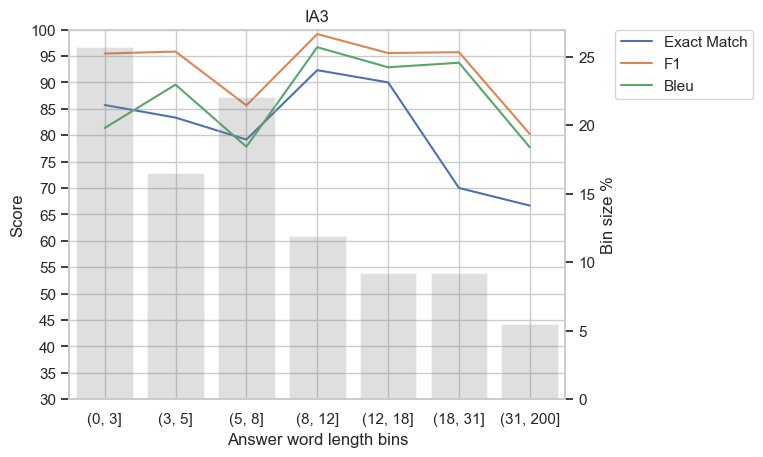

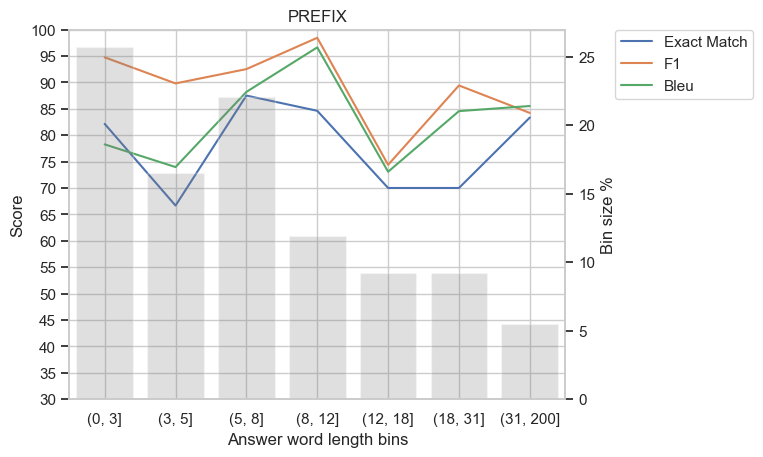

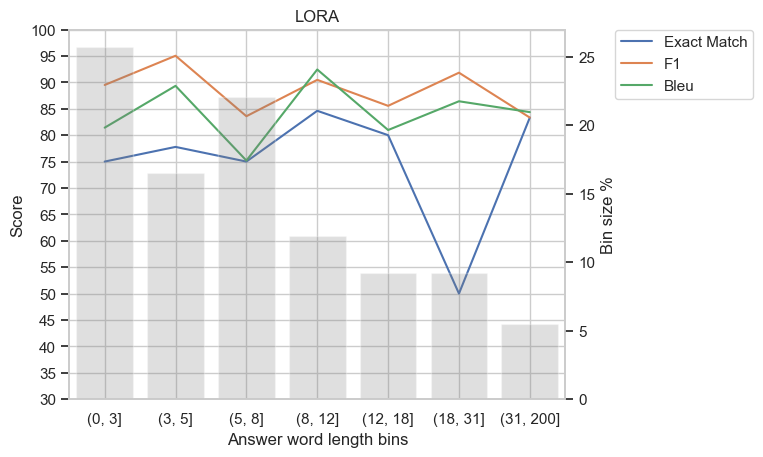

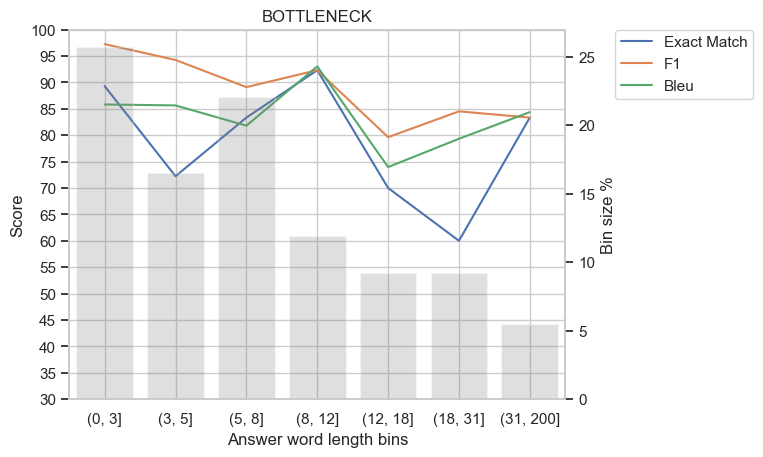

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

bins = [
    {"label": "(0, 3]", "value": 28},
    {"label": "(3, 5]", "value": 18},
    {"label": "(5, 8]", "value": 24},
    {"label": "(8, 12]", "value": 13},
    {"label": "(12, 18]", "value": 10},
    {"label": "(18, 31]", "value": 10},
    {"label": "(31, 200]", "value": 6},
]
total = 0
for _bin in bins:
    total += _bin["value"]

for _bin in bins:
    _bin["ratio"] = _bin["value"] / total * 100

bin_df = pd.DataFrame(bins)
bin_df = bin_df.reset_index(drop=True)

# read from csv
def plot(name):
    df = pd.read_csv(f"{name}.csv")

    sns.set_theme(style="whitegrid")
    fig, ax = plt.subplots()
    ax.set_ylim(30, 100)
    ax.set_yticks(range(30, 101, 5))
    sns.lineplot(x="label", y="em", data=df, ax=ax, legend=True, label="Exact Match")
    sns.lineplot(x="label", y="f1", data=df, ax=ax, legend=True, label="F1")
    sns.lineplot(x="label", y="bleu", data=df, ax=ax, legend=True, label="Bleu")
    ax.set(xlabel="Answer word length bins", ylabel="Score")
    plt.legend(bbox_to_anchor=(1.1, 1), loc="upper left", borderaxespad=0)

    # plot bar chart of bin size in the same figure
    ax2 = ax.twinx()
    sns.barplot(x="label", y="ratio", data=bin_df, ax=ax2, color="grey", alpha=0.25)
    ax2.set(ylabel="Bin size %")
    ax2.grid(False)

    plt.title(name.upper())

    plt.show()
    fig.savefig(f"./figs/{name}.png", bbox_inches="tight")


names = ["1shot", "ia3", "prefix", "lora", "bottleneck"]
for name in names:
    plot(name)